### This script contains:

#### 1. Import libraries & datasets
#### 2. Create Charts
#### 3. Create Charts - Orders per day of the week
#### 4. Create Charts - Orders by hour of the day
#### 5. Create Charts - Products ordered per price range
#### 6. Create Charts - Age v Spending Power
#### 7. Create Charts - Loyalty Flag
#### 8. Create a subset for Line Charts
#### 9. Create Charts - Expenditure v Day of the week
#### 10. Create Charts - Expenditure v Hour of the day
#### 11. Create Charts - Age v Number of Children
#### 12. Export the visualisations

## Importing libraries and datasets

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Folder path into usable string
path = r'C:\Users\willm\Instacart Basket Analysis'

In [3]:
#Import 4.9 final Dataset
df49 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '49_df_combined.pkl'))

### Creating charts

In [4]:
#Checking what columns we have to do charts and plots off
df49.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32399732 entries, 0 to 32399731
Data columns (total 30 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   order_id                      object  
 1   user_id                       object  
 2   order_number                  int8    
 3   orders_day_of_week            int8    
 4   order_hour_of_day             int8    
 5   days_since_prior_order        float16 
 6   first_order                   object  
 7   product_id                    int32   
 8   reordered                     int8    
 9   product_name                  object  
 10  aisle_id                      int8    
 11  department_id                 int8    
 12  prices                        float16 
 13  price_range_loc               object  
 14  busiest_day                   object  
 15  busiest_period_of_day         object  
 16  max_order                     int8    
 17  loyalty_flag                  object  
 18  

### Creating Charts - Orders per day of the week

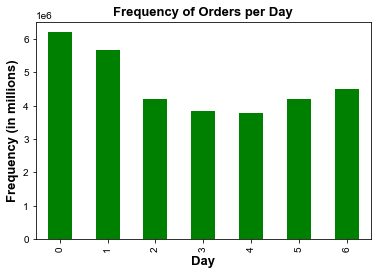

In [4]:
bar1 = df49['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['green'])
sns.set_style('ticks')
plt.xlabel('Day',fontsize=13, fontweight = 'bold')
plt.ylabel('Frequency (in millions)',fontsize=13, fontweight = 'bold')
plt.title('Frequency of Orders per Day',fontsize=13, fontweight = 'bold')
plt.show()

### Creating Charts - Orders by hour of the day

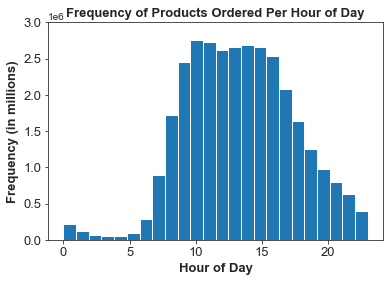

In [6]:
#Creating a histogram to show orders by hour of the day - 24 hours of the day, 24 bins
hist2 = df49['order_hour_of_day'].plot.hist(bins = 24)
sns.set_style('ticks')
plt.xlabel('Hour of Day',fontsize=13, fontweight = 'bold')
plt.ylabel('Frequency (in millions)',fontsize=13, fontweight = 'bold')
plt.xticks(fontsize=13)
y_ticks = np.arange(1, 3100000, 500000)
plt.yticks(y_ticks, fontsize=13)
plt.title('Frequency of Products Ordered Per Hour of Day',fontsize=13, fontweight = 'bold')
plt.show()

#### The histogram shows that there are very little orders from 10pm until 7am, when the orders increase to a peak between 10am and 4pm.

### Creating Charts - Products ordered per price range

In [7]:
df49.loc[df49['prices'] >100, 'prices'] = np.nan

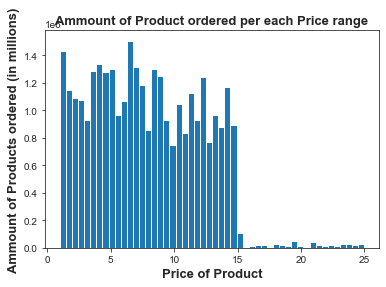

In [5]:
hist1 = df49['prices'].plot.hist(bins = 50)
sns.set_style('ticks')
plt.xlabel('Price of Product',fontsize=13, fontweight = 'bold')
plt.ylabel('Ammount of Products ordered (in millions)',fontsize=13, fontweight = 'bold')
plt.title('Ammount of Product ordered per each Price range',fontsize=13, fontweight = 'bold')
plt.show()

### Creating Charts - Age v Spending Power

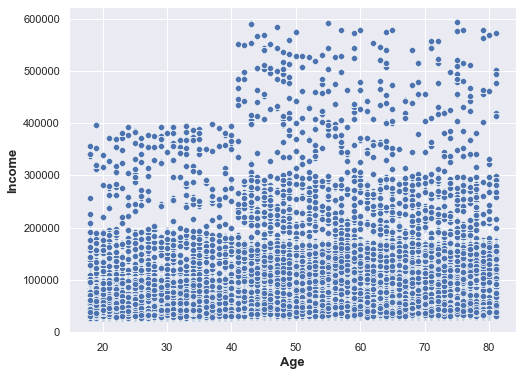

In [13]:
#Creating a scatterplot to see if the age of a customer affects their spending power
sns.set(rc={"figure.figsize":(8, 6)})
splot2 = sns.scatterplot(x = 'age', y = 'income',data = df49)
plt.xlabel('Age', fontsize = 13, fontweight = 'bold')
plt.ylabel('Income', fontsize = 13, fontweight = 'bold')
plt.show()

#### The scatterplot shows that our customers in the under 20's to 40 age bracket tend to earn up to 200k, with a few outliers earning up to 400k. 
#### If they are over 40 then they tend to range up to 300k, with outliers reaching as high as 600k per year.

### Creating Charts - Loyalty Flag

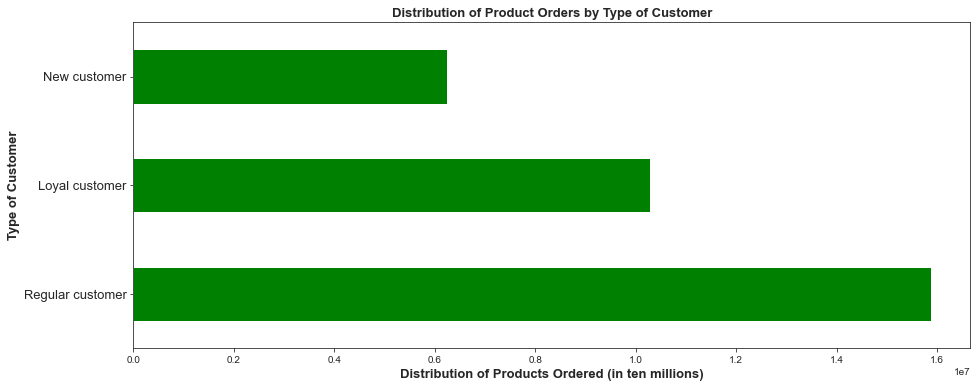

In [6]:
#Creating a bar chart to show how many Loyal Customers there are compared to Regular Customers and New Customers
bar2 = df49['loyalty_flag'].value_counts().plot.barh(figsize = (15,6), color = ['green'])
sns.set_style('ticks')
plt.xlabel('Distribution of Products Ordered (in ten millions)',fontsize=13, fontweight = 'bold')
plt.ylabel('Type of Customer',fontsize=13, fontweight = 'bold')
plt.title('Distribution of Product Orders by Type of Customer',fontsize=13, fontweight = 'bold')
plt.yticks(fontsize = 13)
plt.show()

### Creating Charts - Price Flag

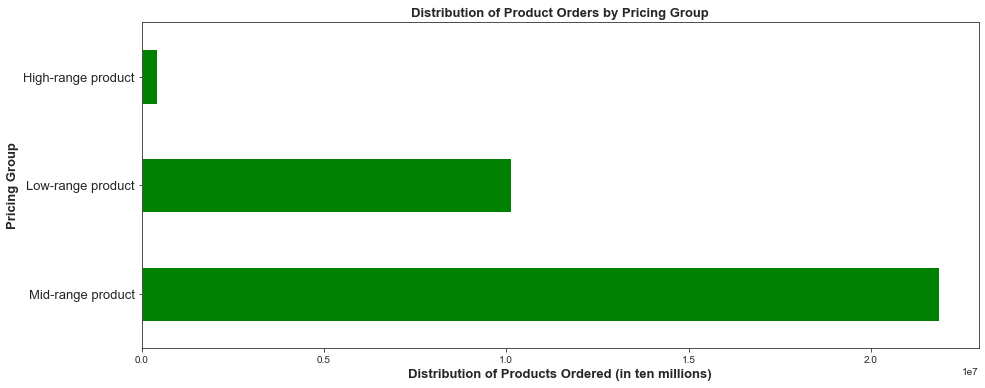

Wall time: 944 ms


In [7]:
%%time
#Creating a bar chart to show how many High-Range products there are compared to Mid-Range and Low-Range products
bar3 = df49['price_range_loc'].value_counts().plot.barh(figsize = (15,6), color = ['green'])
sns.set_style('ticks')
plt.xlabel('Distribution of Products Ordered (in ten millions)',fontsize=13, fontweight = 'bold')
plt.ylabel('Pricing Group',fontsize=13, fontweight = 'bold')
plt.title('Distribution of Product Orders by Pricing Group',fontsize=13, fontweight = 'bold')
plt.yticks(fontsize = 13)
plt.show()

### Creating a subset for line charts

In [10]:
np.random.seed(4)
dev = np.random.rand(len(df49)) <= 0.7

In [11]:
big = df49[dev]
small = df49[~dev]

In [12]:
#Checking that the total of both the small and big subsets equals the total records in my dataframe
#df49.info() above states: Index: 32404859 entries
len(big) + len(small)

32399732

### Creating Charts - Expenditure v Day of the week

In [13]:
df49s = small[['orders_day_of_week','prices']]

In [14]:
df49b = big[['orders_day_of_week','prices']]

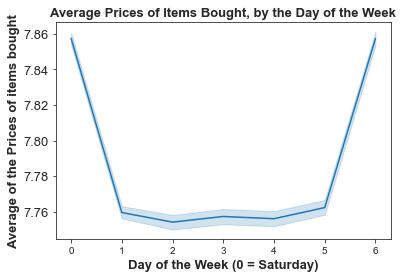

Wall time: 16min 16s


In [23]:
%%time
#Creating a Line Chart using the small subset

line1 = sns.lineplot(data = df49, x = 'orders_day_of_week',y = 'prices')
plt.xlabel('Day of the Week (0 = Saturday)',fontsize=13, fontweight = 'bold')
plt.ylabel('Average of the Prices of items bought',fontsize=13, fontweight = 'bold')
plt.title('Average Prices of Items Bought, by the Day of the Week',fontsize=13, fontweight = 'bold')
plt.yticks(fontsize = 13)
plt.show()

### Creating Charts - Expenditure v Hour of the day

In [26]:
#Using my subsets from above, selecting prices and order_hour_of_the_day
df49s2 = small[['order_hour_of_day','prices']]
df49b2 = big[['order_hour_of_day','prices']]

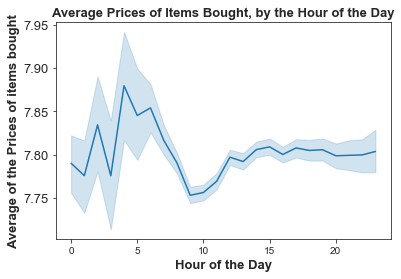

Wall time: 1min 58s


In [28]:
%%time
#Creating a Line Chart using the small subset
line2 = sns.lineplot(data = df49s2, x = 'order_hour_of_day',y = 'prices')
plt.xlabel('Hour of the Day',fontsize=13, fontweight = 'bold')
plt.ylabel('Average of the Prices of items bought',fontsize=13, fontweight = 'bold')
plt.title('Average Prices of Items Bought, by the Hour of the Day',fontsize=13, fontweight = 'bold')
plt.yticks(fontsize = 13)
plt.show()

### Creating Charts - Age v Number of Children

In [19]:
#Using my subsets from above, selecting prices and order_hour_of_the_day
df49s3 = small[['children','age']]
df49b3 = big[['children','age']]

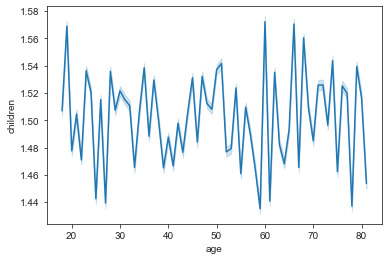

In [20]:
#Creating a Line Chart using the big subset
line4 = sns.lineplot(data = df49b3, x = 'age',y = 'children')

#### The line chart shows that the average number of children people have ranges from 1.44 to 1.57 for each age, even from under 20 years old to 81 years of age.

### Exporting the visualisations

In [8]:
line1.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'fc_line_prices_by_day.png'))

NameError: name 'line1' is not defined

In [9]:
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'fc_bar_orders_by_price_group.png'))

In [10]:
hist2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'hist_orders_over_the_dayfc.png'))

NameError: name 'hist2' is not defined

In [11]:
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_customers_by_loyaltyfc.png'))

In [29]:
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_prices_by_hour.png'))

In [25]:
line4.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_age_v_children.png'))

In [26]:
splot2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'scatterplot_age_income_connectionfc.png'))

In [27]:
hist1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'range_of_prices_of_productsfc.png'))

In [12]:
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'freq_of_orders_per_dayfc.png'))